In [2]:
# 导入相关模块
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# 设置显示中文
plt.rcParams['font.sans-serif'] = ['KaiTi']
plt.rcParams['axes.unicode_minus'] = False

#读取数据
df = pd.read_csv('我国1978~1997年的财政收入y和国民生产总值x.csv')
df.head(10) # 取前10个数据显示

,年份,x,y
0,1978,3624.1,1132.26
1,1979,4038.2,1146.38
2,1980,4517.8,1159.93
3,1981,4860.3,1175.79
4,1982,5301.8,1212.33
5,1983,5957.4,1366.95
6,1984,7206.7,1642.86
7,1985,8989.1,2004.82
8,1986,10201.4,2122.01
9,1987,11954.5,2199.35


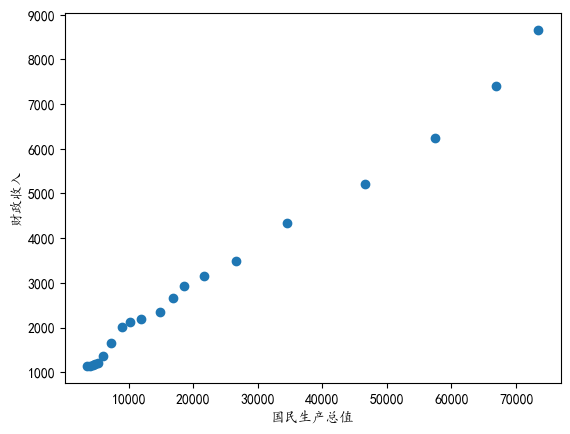

In [3]:

X = np.array(df['x']).reshape(-1, 1)
Y = np.array(df['y']).reshape(-1, 1)
plt.scatter(X,Y) # 查看散点图
plt.xlabel('国民生产总值')
plt.ylabel('财政收入')
plt.show()

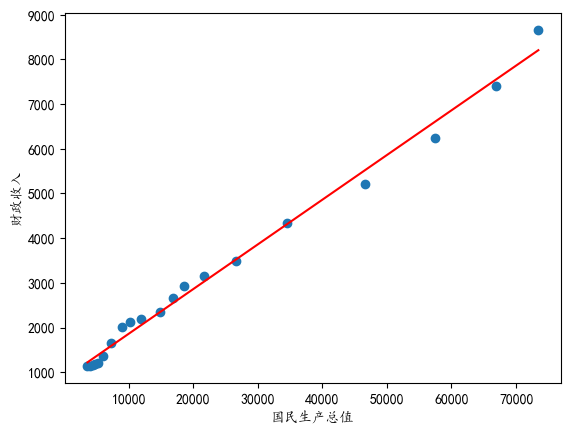

In [4]:

# 模型搭建
model = LinearRegression()
model.fit(X,Y)

# 模型可视化
plt.scatter(X,Y)
plt.plot(X,model.predict(X),color='red')
plt.xlabel('国民生产总值')
plt.ylabel('财政收入')
plt.show()

In [5]:
#查看系数,截距：线性回归方程构造
model.coef_,model.intercept_

(array([[0.10003077]]), array([858.31077996]))

In [6]:
import statsmodels.api as sm

# add_constant()函数给原来的特征变量X添加常数项，并赋给X2，这样才有y＝ax＋b中的常数项，即截距b
X2 = sm.add_constant(X)
# 用OLS()和fit()函数对Y和X2进行线性回归方程搭建
est = sm.OLS(Y,X).fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                              661.7
Date:                Mon, 18 Mar 2024   Prob (F-statistic):                    3.14e-16
Time:                        10:54:51   Log-Likelihood:                         -157.24
No. Observations:                  20   AIC:                                      316.5
Df Residuals:                      19   BIC:                                      317.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [9]:
# 预测
model.predict(np.array(78017.8).reshape(1, -1))

array([[8662.49124893]])

In [22]:
# 计算置信区间和预测区间
pred = est.get_prediction(78017.8)
conf_int = pred.conf_int(0.95)  # 置信区间
pred_int = pred.conf_int(0.95)  # 预测区间
pred_int

array([[ 7813.38086116, 10912.33443307]])